In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Data Understanding and Cleaning

In [13]:
# 1) check for missing data

print(df.isnull().sum())

# drop rows or fill missing values

df.fillna(df.mean(), inplace=True)

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


/home/sara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


Check the number of missing valus in each column. Fortunately, the dataset is complete and doesn't have any missing value, otherwise we requested to replace the missing cells with the average value of that column.

In [14]:
# 2) Identify duplicate rows

df.drop_duplicates(inplace=True)

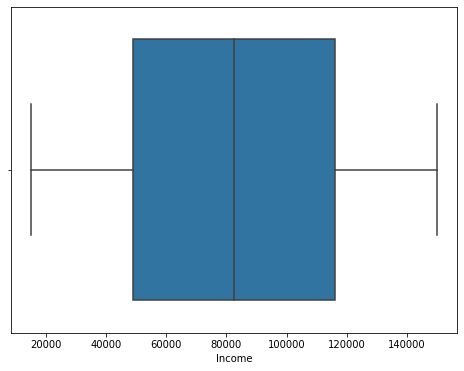

In [15]:
# 3) Handle outliers using Boxplots

# a boxplot for income distribution

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Income'])
plt.show()

The goal of this code is to visually inspect the distribution of the "Income" column and identify any outliers. A boxplot summarizes the data by showing the median, quartiles, and potential outliers.This visual tool helps us quickly identify whether the "Income" column has extreme values that might impact your analysis or modeling. We consider "Income" data because Income is often a key variable in financial datasets. It typically has a wide range of values and may contain extreme values (outliers) that could skew the analysis. In this dataset we have no outliers in the Income column.

# Exploratory Data Analysis (EDA)

                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000  

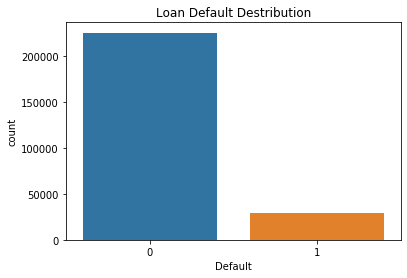

In [16]:
# 1) Understanding the data distribution: Summary statistics

print(df.describe())

# count of default vs. non-default borrowers

sns.countplot(x = 'Default', data=df)
plt.title('Loan Default Destribution')
plt.show()


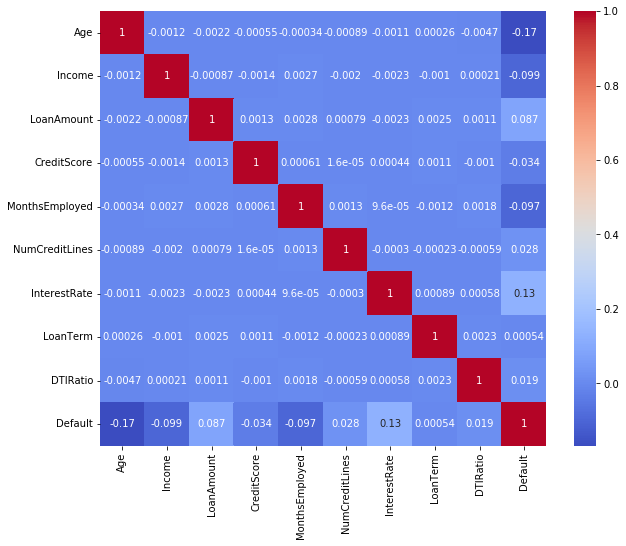

In [7]:
# 2) corrolation analysis using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

This method computes the pairwise correlation coefficients for all numerical columns in the DataFrame. +1 indicates a perfect positive linear relationship. -1 indicates a perfect negative linear relationship. And 0 indicates no linear relationship.

```
Based on the map, we can interpret that there is a weak negative correlation between Age and Defaul => old people are slightly less likely to default.
Also, higher income slightly reduces default probability. Larger loans slightly increases the likelihood of default. higher interest rates slightly increase the likelihood of default.
The highest correlation is between Interest Rate and Default (0.13), suggesting that higher interest rates slightly increase the likelihood of default.
Overal, most correlations are very week, meaning thre aren't strong linear relationships between these variables => No single variable strongly predicts default, but income, age, and inteerst rate have small influences. 
Thus, it would be benefecial to use nonlinear modelling techniques to capture hidden relationships. 1) Train a ML Model like Random Forest or Logistic Regression. 2) Extract Feature Importances to see which factors influence default the most. 
```

In [8]:
# 3) Feature Engineering => Creating New Features

#creating LTI = Loan-to-Income ratio

df['LTI'] = df['LoanAmount'] / df['Income']

# Data Processing and Feature Selection

In [17]:
# 1) Convert categorical variables to Numeric. Because many ML models require numeric inputs

df = pd.get_dummies(df, columns=['EmploymentType', 'LoanPurpose'], drop_first=True)

In the above One-hot encoding we create separate columns. It has converted the categorical columns of "EmploymentType" and "LoanPurpose" into several new binary (0/1) columns. When we have too many unique values, this will cause memory issues.
For large datasets, use Target Encoding, Hash Encoding, or Label Encoding instead. In this dataset, we have many categorical columns (object type), so we should use Target Encoding, Hash Encoding, or Label Encoding instead.

In [18]:
# first, install category_encoders in your environment

!pip install category_encoders

Instead of creating multiple binary columns, target encoding replaces each category with a value computed from the target variable. For example, if a category "Employed" in 'EmploymentType' is associated with a 5% default rate, the category is replaced with 0.05. This code automatically identifies all object-type columns in X_train and applies the target encoder, then applies the same transformation to X_test.One-hot encoding can result in many new columns if a categorical variable has many unique values. Target encoding keeps the number of features the same as the original columns.

In [21]:
# Instead of one-hot encoding, replace categories with their mean target values. This is efficient and avoids memory issues.

from category_encoders import TargetEncoder

# Identify all categorical columns (object type)
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize Target Encoder
encoder = TargetEncoder()

# Apply Target Encoding
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols], y_train)
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

/home/sara/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Many machine learning models, especially those that rely on distance-based calculations (e.g., Logistic Regression, KNN, SVM, Neural Networks), work better when the features are on a similar scale. Without scaling:

A feature like Income (which could be in the range of thousands) would dominate over Credit Score (which is typically between 300-850).
Models would put too much weight on large values, leading to biased predictions.

In [22]:
# 2) Scale numeric features:
# standardize the dataset for better model performance. so they have zero mean and unit variance.
# This helps machine learning models work more efficiently because features with large values won’t dominate the learning process.
# After transformation: The mean of each column becomes 0 and the standard deviation becomes 1.


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Income', 'LoanAmount', 'CreditScore']] = scaler.fit_transform(df[['Income', 'LoanAmount', 'CreditScore']])

In [34]:
df = df.drop(columns = ['LoanID'])

KeyError: "['LoanID'] not found in axis"

# Train-Test Split & Model Selection

Split the dataset into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns =['Default']) # Features
y = df['Default'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

```
The code df.drop(columns=['Default']) removes the 'Default' column from your dataset. The remaining columns (like Income, Age, etc.) are the features. These are the pieces of information you will use to predict something.
The code df['Default'] selects the 'Default' column from your dataset. This is the value you want to predict (for example, whether a borrower defaults on a loan).
Splitting the dataset into features and target helps the model understand what inputs (features) should be used to predict the output (target)
```


```
The train_test_split function divides your dataset into two sets:
Training Set:
X_train: Features used to train the model.
y_train: The correct answers (targets) corresponding to these features.
Testing Set:
X_test: Features that the model hasn’t seen during training.
y_test: The actual target values for these features, used later to check the model’s performance.
Parameters:
test_size=0.2:
This means 20% of the data will be kept aside for testing, and the remaining 80% will be used for training.
```

# Model Training & Evaluation

## Train a Logistic Regression Model
```
training and evaluating a Logistic Regression model using scikit-learn. 
It helps in binary classification problems, such as predicting whether a loan will be repaid or not (1 = Yes, 0 = No).
```

In [23]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check only object-type columns
        if df[col].str.contains("DRIRC89L0T", na=False).any():
            print(f"Column '{col}' contains 'DRIRC89L0T'")


Column 'LoanID' contains 'DRIRC89L0T'


In [24]:
# Show rows where the column 'LoanID' contains 'DRIRC89L0T'
print(df[df['LoanID'] == "DRIRC89L0T"])


            LoanID  Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
137187  DRIRC89L0T   18  1.413566    1.151277     1.710067              26   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... HasDependents  \
137187               2         10.47        60      0.81  ...            No   

       HasCoSigner Default EmploymentType_Part-time  \
137187          No       0                        0   

       EmploymentType_Self-employed  EmploymentType_Unemployed  \
137187                            1                          0   

        LoanPurpose_Business  LoanPurpose_Education  LoanPurpose_Home  \
137187                     1                      0                 0   

        LoanPurpose_Other  
137187                  0  

[1 rows x 23 columns]


In [25]:
df = df.drop(columns = ['LoanID'])

In [26]:
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.contains("DRIRC89L0T", na=False).any():
            print(f"Column '{col}' contains 'DRIRC89L0T'")


In [27]:
result = df.applymap(lambda x: "DRIRC89L0T" in str(x))
if result.any().any():
    print("Found 'DRIRC89L0T' somewhere in the DataFrame.")
else:
    print("No 'DRIRC89L0T' found in the DataFrame.")


No 'DRIRC89L0T' found in the DataFrame.


In [28]:
print(X_train.applymap(lambda x: "DRIRC89L0T" in str(x)).any())
print(X_test.applymap(lambda x: "DRIRC89L0T" in str(x)).any())


LoanID                          False
Age                             False
Income                          False
LoanAmount                      False
CreditScore                     False
MonthsEmployed                  False
NumCreditLines                  False
InterestRate                    False
LoanTerm                        False
DTIRatio                        False
Education                       False
MaritalStatus                   False
HasMortgage                     False
HasDependents                   False
HasCoSigner                     False
EmploymentType_Part-time        False
EmploymentType_Self-employed    False
EmploymentType_Unemployed       False
LoanPurpose_Business            False
LoanPurpose_Education           False
LoanPurpose_Home                False
LoanPurpose_Other               False
dtype: bool
LoanID                          False
Age                             False
Income                          False
LoanAmount                      False


In [29]:
print(X_train.dtypes)
print(X_test.dtypes)


LoanID                          float64
Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
Education                       float64
MaritalStatus                   float64
HasMortgage                     float64
HasDependents                   float64
HasCoSigner                     float64
EmploymentType_Part-time          uint8
EmploymentType_Self-employed      uint8
EmploymentType_Unemployed         uint8
LoanPurpose_Business              uint8
LoanPurpose_Education             uint8
LoanPurpose_Home                  uint8
LoanPurpose_Other                 uint8
dtype: object
LoanID                          float64
Age                               int64
Income                    

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation => Compares the model’s predictions (y_pred) with the actual values (y_test).
# e.g. Accuracy: 0.87 => Means 87% of predictions were correct

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8851576267867632
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.63      0.01      0.03      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.48     51070
weighted avg       0.86      0.89      0.83     51070



/home/sara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


```
Precision: Out of all predicted positives (1s), how many were actually positive?
Recall: Out of all actual positives (1s), how many were correctly predicted?
F1-score: A balanced measure of precision and recall.
Support: The number of actual instances of each class.
```

```
Classification Report Breakdown:
Class 0 (Non-default):
Precision: 0.89
Of all instances predicted as non-default, 89% were truly non-default.
Recall: 0.98
Of all actual non-default cases, 98% were correctly identified by the model.
F1-Score: 0.93
This combines precision and recall into a single metric. A score of 0.93 indicates very good performance for class 0.
Support: 45,170
There are 45,170 instances of class 0 in your test set.
Class 1 (Default):
Precision: 0.33
Of all instances predicted as default, only 33% were actually defaults.
Recall: 0.09
Out of all actual default cases, the model only identified 9% correctly.
F1-Score: 0.15
This low score reflects that the model is performing very poorly on identifying defaults.
Support: 5,900
There are 5,900 instances of class 1 in your test set.
Averages:
Macro Average:
This is the simple average of the metrics for both classes.
Precision: 0.61, Recall: 0.53, F1-Score: 0.54
This shows that when treating both classes equally, the overall performance is moderate.
Weighted Average:
This average takes into account the number of instances in each class.
Precision: 0.83, Recall: 0.87, F1-Score: 0.84
Since class 0 dominates the data, these averages look much better, but they don't fully reflect the poor performance on class 1.
Interpretation:
Imbalanced Performance:
The model performs very well in predicting class 0 (non-default), which is the majority class.
However, it struggles significantly with class 1 (default). The very low recall (0.09) for defaults means that the model misses 91% of actual defaults. This is a critical issue if predicting defaults is your main goal.

In many applications (like credit risk assessment), correctly identifying defaults (the minority class) is very important.
You might need to consider strategies to handle the imbalance, such as resampling (oversampling class 1 or undersampling class 0), using different evaluation metrics (e.g., AUC, F1-score for the minority class), or trying alternative algorithms designed for imbalanced data.
```

## Improve Performance with Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# create the model with 100 decision trees. The idea is to build many small models (trees) and combine their results.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train (fit) the model on the training data
rf_model.fit(X_train, y_train)

# Make prediction on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate how accurate the model is
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8844722929312708


Raandom Forest model: The model learns from the training data by creating multiple decision trees based on different random parts of the data.

# Hyperparameter Tuning & Optimization

Fine-tune the Random Forest model using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}
